In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [2]:
# Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). 
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. 
# Разбейте выборку на обучающую и тестовую,используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [4]:
data = pd.read_csv('gbm-data.csv')

In [5]:
len(data) # размер матрицы = 3751 х 1777

3751

In [6]:
data[:5]

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = data.loc[:, 'D1':'D1776']

In [8]:
y = data.iloc[:,:1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=241)

In [10]:
# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 
# и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
#   - Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
#   - Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), 
#     где y_pred — предсказанное значение.
#   - Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) 
# на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [11]:
def sigmoid(y_pred):
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    # где y_pred — предсказаное значение.
    return 1.0 / (1.0 + math.exp(-y_pred))

In [1]:
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    clf.fit(x_train, y_train)
    
    train_loss = []
    for pred in clf.staged_decision_function(x_train):
           train_loss.append(log_loss(y_train, [sigmoid(y_pred) for y_pred in pred]))
    
    test_loss = []
    for pred in clf.staged_decision_function(x_test):
           test_loss.append(log_loss(y_test, [sigmoid(y_pred) for y_pred in pred]))

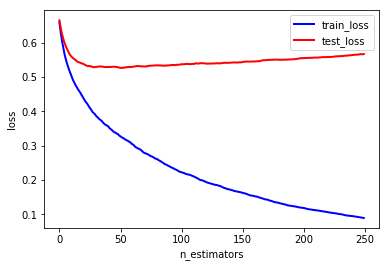

In [16]:
plt.figure()
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.plot(train_loss, 'b', linewidth=2)
plt.plot(test_loss, 'r', linewidth=2)
plt.legend(['train_loss', 'test_loss'])
plt.show()

In [17]:
min_loss_train = min(train_loss)
min_loss_test= min(test_loss)
min_loss_index1 = train_loss.index(min_loss_train)
min_loss_index2 = test_loss.index(min_loss_test)

In [18]:
min_loss_train, min_loss_index1 

(0.089369624162740857, 249)

In [19]:
min_loss_test, min_loss_index2

(0.52692018722758438, 51)

In [20]:
# 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: 
# переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [21]:
# Ответ: overfitting, т.к. функция потерь на обучающей выборке принимает значение менее 1%, 
# зато на тестовой выборке значение функции потерь превышает 50%, 
# что говорит нам о том, что алгоритм работает хуже, чем константный метод. что является сдедствием его переобучения.

In [22]:
# 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, 
# при learning_rate = 0.2.

In [23]:
clf = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, verbose=True, random_state=241)
clf.fit(x_train, y_train)
     
test_loss = []
for pred in clf.staged_decision_function(x_test):
    test_loss.append(log_loss(y_test, [sigmoid(y_pred) for y_pred in pred]))

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.80s
         2           1.1715           14.35s
         3           1.1009           14.01s
         4           1.0529           15.00s
         5           1.0130           14.94s
         6           0.9740           14.58s
         7           0.9475           13.51s
         8           0.9197           13.55s
         9           0.8979           13.03s
        10           0.8730           12.97s
        20           0.7207           10.43s
        30           0.6055            9.59s
        40           0.5244            8.77s
        50           0.4501            8.24s
        60           0.3908            7.94s
        70           0.3372            7.65s
        80           0.3009            7.19s
        90           0.2603            6.85s
       100           0.2327            6.46s
       200           0.0835            2.14s


In [24]:
min_loss_test= min(test_loss)
min_loss_index = test_loss.index(min_loss_test)

In [25]:
print('{:0.2f} {}'.format(min_loss_test,min_loss_index))

0.53 36


In [26]:
# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, 
# на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, 
# c random_state=241 и остальными параметрами по умолчанию. 
# Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [2]:
rfc = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
rfc.fit(x_train, y_train)

In [28]:
y_pred = rfc.predict_proba(x_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

In [29]:
print('{:0.2f}'.format(test_loss))

0.54
